In [1]:
import numpy as np

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import math

In [3]:
data2003 = pd.read_csv("Downloads/2003.csv")
data2004 = pd.read_csv("Downloads/2004.csv")
data2005 = pd.read_csv("Downloads/2005.csv")
data2006 = pd.read_csv("Downloads/2006.csv")
data2007 = pd.read_csv("Downloads/2007.csv")
data2008 = pd.read_csv("Downloads/2008.csv")

/Users/leva94/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = pd.concat([data2003, data2004, data2005, data2006, data2007, data2008])

In [5]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
data["UniqueCarrier"].value_counts()

WN    6454950
AA    4006697
DL    3440463
OO    3090853
MQ    3025493
UA    3025212
US    2701364
NW    2682336
XE    2350309
CO    1829727
EV    1697172
OH    1464176
FL    1265138
AS     957377
YV     854056
B6     811341
DH     693047
HP     583311
9E     521059
F9     336958
HA     274265
TZ     208420
AQ      89547
Name: UniqueCarrier, dtype: int64

In [171]:
data_work = data.loc[data["UniqueCarrier"] == "CO"][["Origin", "Dest"]]

In [172]:
data_work["Flight"] = data_work["Origin"] + data_work["Dest"]

In [173]:
final = data_work["Flight"].value_counts()

In [174]:
final.to_csv("continental.csv", sep=',', encoding='utf-8')

In [175]:
final

BOSEWR    22751
EWRBOS    22348
IAHLAX    21956
EWRIAH    21787
MSYIAH    21767
IAHMSY    21754
LAXIAH    21726
IAHEWR    21198
IAHSAT    21069
SATIAH    21066
IAHAUS    20782
AUSIAH    20771
EWRMCO    19437
MCOEWR    19433
LGAIAH    19358
IAHLGA    19308
FLLEWR    16858
EWRFLL    16825
IAHDCA    16180
DCAIAH    16156
EWRATL    15382
ATLEWR    15349
IAHLAS    15281
IAHORD    15206
LASIAH    15135
ORDIAH    15105
DENIAH    15099
ORDEWR    14982
IAHDEN    14973
EWRORD    14881
          ...  
IAHCVG        1
SJCSAN        1
ORDCLE        1
SEAPDX        1
CLEMKE        1
MIAIND        1
LAXCMH        1
SEAMSY        1
SDFBOS        1
BHMEWR        1
LAXSDF        1
MDWCLE        1
PHLJAX        1
BWIEWR        1
LAXIND        1
SJCSFO        1
LBBIAH        1
SFOSAN        1
IAHCHS        1
SDFSMF        1
BOSSDF        1
EWRPHL        1
MSYSEA        1
SNACLE        1
MKECLE        1
INDLAX        1
MKEMDW        1
ORDMDW        1
LGAJAX        1
MSYCMH        1
Name: Flight, Length: 45

In [191]:
data_short = pd.read_csv("southwest.csv", sep=",", names=["Flight", "Quantity"])

In [192]:
data_short

,Flight,Quantity
0,HOUDAL,59303
1,DALHOU,57323
2,OAKLAX,43947
3,LAXOAK,43942
4,PHXLAS,38840
5,LASPHX,38738
6,OAKSAN,36759
7,SANOAK,36733
8,OAKBUR,31224
9,BUROAK,31126


In [193]:
data_short["ORIGIN"] = data_short["Flight"].apply(lambda x: x[0:3])
data_short["DESTINATION"] = data_short["Flight"].apply(lambda x: x[3:6])

In [194]:
data_short

,Flight,Quantity,ORIGIN,DESTINATION
0,HOUDAL,59303,HOU,DAL
1,DALHOU,57323,DAL,HOU
2,OAKLAX,43947,OAK,LAX
3,LAXOAK,43942,LAX,OAK
4,PHXLAS,38840,PHX,LAS
5,LASPHX,38738,LAS,PHX
6,OAKSAN,36759,OAK,SAN
7,SANOAK,36733,SAN,OAK
8,OAKBUR,31224,OAK,BUR
9,BUROAK,31126,BUR,OAK


In [195]:
air_info = data_short.groupby("ORIGIN")["Quantity"].sum() + data_short.groupby("DESTINATION")["Quantity"].sum()

In [196]:
air_info

ORIGIN
ABQ    254661
ALB     51484
AMA     45330
AUS    195638
BDL     81600
BHM    101538
BNA    352355
BOI     76396
BUF     59028
BUR    230451
BWI    694905
CLE     81607
CMH     91893
CRP     23468
DAL    510506
DEN    103629
DTW     72939
ELP    147058
FLL    174971
GEG     63189
HOU    577291
HRL     49295
IAD     18300
IAH      8735
IND     71734
ISP    120337
JAN     38306
JAX     90504
LAS    894770
LAX    495904
        ...  
MDW    769472
MHT    115780
MSY    171054
OAK    555063
OKC     82362
OMA     61775
ONT    230461
ORF     50375
PBI     49035
PDX    159281
PHL    182601
PHX    814837
PIT     52690
PVD    136769
RDU    111863
RNO    172155
RSW     23770
SAN    385111
SAT    196496
SDF     81101
SEA    169800
SFO     30487
SJC    312875
SLC    178464
SMF    326738
SNA    140673
STL    280256
TPA    299256
TUL     84211
TUS     70762
Name: Quantity, Length: 65, dtype: int64

In [176]:
air_info.nlargest(65)

ORIGIN
LAS    894770
PHX    814837
MDW    769472
BWI    694905
HOU    577291
OAK    555063
DAL    510506
LAX    495904
MCO    385770
SAN    385111
BNA    352355
SMF    326738
SJC    312875
TPA    299256
MCI    283346
STL    280256
ABQ    254661
ONT    230461
BUR    230451
SAT    196496
AUS    195638
PHL    182601
SLC    178464
FLL    174971
RNO    172155
MSY    171054
SEA    169800
PDX    159281
ELP    147058
SNA    140673
        ...  
BHM    101538
CMH     91893
JAX     90504
TUL     84211
OKC     82362
CLE     81607
BDL     81600
SDF     81101
BOI     76396
DTW     72939
IND     71734
TUS     70762
GEG     63189
OMA     61775
LIT     59404
BUF     59028
LBB     55112
MAF     52873
PIT     52690
ALB     51484
ORF     50375
HRL     49295
PBI     49035
AMA     45330
JAN     38306
SFO     30487
RSW     23770
CRP     23468
IAD     18300
IAH      8735
Name: Quantity, Length: 65, dtype: int64

In [197]:
largest_airports = air_info.nlargest(65).index

In [198]:
largest_airports

Index(['LAS', 'PHX', 'MDW', 'BWI', 'HOU', 'OAK', 'DAL', 'LAX', 'MCO', 'SAN',
       'BNA', 'SMF', 'SJC', 'TPA', 'MCI', 'STL', 'ABQ', 'ONT', 'BUR', 'SAT',
       'AUS', 'PHL', 'SLC', 'FLL', 'RNO', 'MSY', 'SEA', 'PDX', 'ELP', 'SNA',
       'PVD', 'ISP', 'MHT', 'RDU', 'DEN', 'BHM', 'CMH', 'JAX', 'TUL', 'OKC',
       'CLE', 'BDL', 'SDF', 'BOI', 'DTW', 'IND', 'TUS', 'GEG', 'OMA', 'LIT',
       'BUF', 'LBB', 'MAF', 'PIT', 'ALB', 'ORF', 'HRL', 'PBI', 'AMA', 'JAN',
       'SFO', 'RSW', 'CRP', 'IAD', 'IAH'],
      dtype='object', name='ORIGIN')

In [199]:
matrix = pd.DataFrame(0, index=largest_airports, columns=largest_airports)

In [200]:
for i in range(986):
    if data_short["ORIGIN"][i] in list(largest_airports):
        if data_short["DESTINATION"][i] in list(largest_airports):
            matrix[data_short["ORIGIN"][i]][data_short["DESTINATION"][i]] += data_short["Quantity"][i]
            matrix[data_short["DESTINATION"][i]][data_short["ORIGIN"][i]] += data_short["Quantity"][i]

In [771]:
class Graph:
    def __init__(self, incidence_matrix):
        self.incidence_matrix = pd.DataFrame(np.array(incidence_matrix), 
                                             index=incidence_matrix.index, columns=incidence_matrix.columns)
        self.prec = pd.Series("", index=incidence_matrix.index)
        self.time_in = pd.Series(-1, index=incidence_matrix.index)
        succlist = []
        for i in incidence_matrix.index:
            succlist.append([])
        self.succ = pd.Series(succlist, index=incidence_matrix.index)
        self.ret = pd.Series(-1, index=incidence_matrix.index)
        self.tight_component = pd.Series(-1, index=incidence_matrix.index)
        self.cur_time = -1
        self.bridges = []
        self.most_popular_dests = []
        
    def reinit(self):
        self.prec = pd.Series("", index=self.incidence_matrix.index)
        self.time_in = pd.Series(-1, index=self.incidence_matrix.index)
        succlist = []
        for i in self.incidence_matrix.index:
            succlist.append([])
        self.succ = pd.Series(succlist, index=self.incidence_matrix.index)
        self.ret = pd.Series(-1, index=self.incidence_matrix.index)
        self.tight_component = pd.Series(-1, index=self.incidence_matrix.index)
        self.cur_time = -1
        self.bridges = []
        
    def find_popular_dests(self):
        the_matrix = pd.DataFrame(np.array(self.incidence_matrix), 
                                    index=self.incidence_matrix.index, columns=self.incidence_matrix.columns)
        maxx = 200000
        list_of_dests = []
        while (maxx > 10000):
            max_origin = the_matrix.max().idxmax()
            max_dest = the_matrix[max_origin].idxmax()
            maxx = the_matrix[max_origin][max_dest]
            the_matrix[max_origin][max_dest] = -maxx
            the_matrix[max_dest][max_origin] = -maxx
            list_of_dests.append([max_origin, max_dest, maxx])
        graph.most_popular_dests = pd.DataFrame(list_of_dests)
        return pd.DataFrame(list_of_dests)
        
    def dfs(self, min_flights, airport):
        for dest in self.incidence_matrix.index:
            if (self.incidence_matrix[airport][dest] >= min_flights):
                if (self.prec[dest] == ""):
                    self.cur_time += 1
                    self.time_in[dest] = self.cur_time
                    self.ret[dest] = self.cur_time
                    self.prec[dest] = airport
                    self.succ[airport].append(dest)
                    self.dfs(min_flights, dest)
        
    def BIG_DFS(self, min_flights):
        for ap in self.incidence_matrix.index:
            if (self.prec[ap] == ""):
                self.prec[ap] = ap
                self.cur_time += 1
                self.time_in[ap] = self.cur_time
                self.ret[ap] = self.cur_time
                self.dfs(min_flights, ap)
        return self.time_in
    
    def count_return(self, ap, min_flights):
        for dest in self.succ[ap]:
            self.count_return(dest, min_flights)
            if (self.ret[dest] < self.ret[ap]):
                self.ret[ap] = self.ret[dest]
        for dest in self.incidence_matrix.index:
            if (self.incidence_matrix[dest][ap] >= min_flights):
                if (dest != self.prec[ap]):
                    if (self.time_in[dest] < self.ret[ap]):
                        self.ret[ap] = self.time_in[dest]
                    
    def COUNT_RETURNS(self, min_flights):
        for airport in self.incidence_matrix.index:
            if (self.prec[airport] == airport):
                self.count_return(airport, min_flights)
    
    def find_tight_component(self, vertex, marker):
        self.tight_component[vertex] = marker
        for dest in self.succ[vertex]:
            if (self.ret[dest] > self.time_in[vertex]):
                self.prec[dest] = dest
                self.bridges.append([vertex, dest])
            else:
                self.find_tight_component(dest, marker)
    
    def TIGHT_COMPONENTS_SPLIT(self, min_flights):
        self.BIG_DFS(min_flights)
        self.COUNT_RETURNS(min_flights)
        marker = -1
        while ((self.tight_component == -1).any()):
            for city in self.incidence_matrix.index:
                if (self.tight_component[city] == -1):
                    if (self.prec[city] == city):
                        marker +=1
                        self.find_tight_component(city, marker)
        return self.tight_component
    
    def GAMMA_ALGORITHM(self, min_flights, component_marker):
        list_of_cities = []
        for city in self.incidence_matrix.index:
            if (self.tight_component[city] == component_marker):
                list_of_cities.append(city)
        if (len(list_of_cities) < 2):
            return True
        component_matrix = self.incidence_matrix[list_of_cities].loc[list_of_cities]
        component_matrix = (component_matrix >= min_flights)
        written_cities = pd.Series(False, index=list_of_cities)
        stack_of_cities = []
        stack_of_cities.append(list_of_cities[0])
        while (len(stack_of_cities) < len(list_of_cities) + 1):
            for city in list_of_cities:
                if (component_matrix[city][stack_of_cities[-1]]):
                    if (len(stack_of_cities) == 1):
                        stack_of_cities.append(city)
                    else:
                        if (city != stack_of_cities[-2]):
                            stack_of_cities.append(city)
        begin = -1
        end = len(stack_of_cities)
        for i in range(len(stack_of_cities)):
            for j in range(i+1, end, 1):
                if (stack_of_cities[i] == stack_of_cities[j]):
                    if (j < end):
                        begin = i
                        end = j
        list_of_faces = []
        face = []
        for i in range(begin, end):
            face.append(stack_of_cities[i])
            component_matrix[stack_of_cities[i]][stack_of_cities[i+1]] = False
            component_matrix[stack_of_cities[i+1]][stack_of_cities[i]] = False
            written_cities[stack_of_cities[i]] = True
        list_of_faces.append(face)
        list_of_faces.append(face)
        while (component_matrix.any().any()):
            set_of_segments = []
            interior_matrix = component_matrix.loc[written_cities, written_cities]
            if (interior_matrix.any().any()):
                for city in interior_matrix.index:
                    for dest in interior_matrix.index:
                        if (interior_matrix[city][dest] & (city > dest)):
                            set_of_vertices = set([])
                            set_of_adjacent = set([city, dest])
                            faces_to_add = []
                            gamma = 0
                            for i in range(len(list_of_faces)):
                                if set_of_adjacent.issubset(set(list_of_faces[i])):
                                    gamma +=1
                                    faces_to_add.append(i)
                            set_of_segments.append((set_of_vertices, set_of_adjacent, gamma, faces_to_add))
            if (not (written_cities.all())):
                rest_matrix = component_matrix.loc[-written_cities, -written_cities]
                segment_markers = pd.Series(-1, index=rest_matrix.index)
                marker = 0
                segment_markers[rest_matrix.index[0]] = 0
                while ((segment_markers == -1).any()):
                    if (rest_matrix.loc[segment_markers == marker, segment_markers != marker].any().any()):
                        for city in segment_markers.index:
                            if (segment_markers[city] == marker):
                                for dest in segment_markers.index:
                                    if (rest_matrix[city][dest]):
                                        segment_markers[dest] = marker
                    else:
                        marker +=1
                        control = True
                        for city in segment_markers.index:
                            if (segment_markers[city] == -1):
                                if (control):
                                    segment_markers[city] = marker
                                    control = False
                for i in range(marker+1):
                    set_of_vertices = set([])
                    set_of_adjacent = set([])
                    for city in segment_markers.index:
                        if (segment_markers[city] == i):
                            set_of_vertices.add(city)
                            for dest in interior_matrix.index:
                                if component_matrix[city][dest]:
                                    set_of_adjacent.add(dest)
                    faces_to_add = []
                    gamma = 0
                    for i in range(len(list_of_faces)):
                        if set_of_adjacent.issubset(set(list_of_faces[i])):
                            gamma +=1
                            faces_to_add.append(i)
                    set_of_segments.append((set_of_vertices, set_of_adjacent, gamma, faces_to_add))
            min_segment = (set([]), set([]), 100 * len(component_matrix.index), [])
            for segment in set_of_segments:
                if (segment[2] < min_segment[2]):
                    min_segment = segment
            if (min_segment[2] == 0):
                return False
            list_of_adjacent = list(min_segment[1])
            if (len(list_of_adjacent) == 1):
                first_vertex = ""
                second_vertex = ""
                for city in min_segment[0]:
                    if (component_matrix[list_of_adjacent[0]][city]):
                        if (first_vertex == ""):
                            first_vertex = city
                        else:
                            if (second_vertex == ""):
                                second_vertex = city
                component_matrix[list_of_adjacent[0]][first_vertex] = False
                component_matrix[first_vertex][list_of_adjacent[0]] = False
                component_matrix[list_of_adjacent[0]][second_vertex] = False
                component_matrix[second_vertex][list_of_adjacent[0]] = False
                visited = pd.Series(False, index=min_segment[0])
                visited[first_vertex] = True
                stack_of_vertices = [first_vertex]
                path = []
                while (len(stack_of_vertices) > 0):
                    current = stack_of_vertices[-1]
                    if (current == second_vertex):
                        path = list(stack_of_vertices)
                    for dest in min_segment[0]:
                        if (current == stack_of_vertices[-1]):
                            if (component_matrix[current][dest]):
                                if (not visited[dest]):
                                    stack_of_vertices.append(dest)
                                    visited[dest] = True
                    if (current == stack_of_vertices[-1]):
                        stack_of_vertices.pop()
                for i in range(len(path) - 1):
                    component_matrix[path[i]][path[i+1]] = False
                    component_matrix[path[i+1]][path[i]] = False
                for i in range(len(path)):
                    written_cities[path[i]] = True
                path.append(list_of_adjacent[0])
                Face = list(list_of_faces[min_segment[3][0]])
                index = Face.index(list_of_adjacent[0]) + 1
                list_of_faces[min_segment[3][0]] = Face[:index]
                list_of_faces[min_segment[3][0]].extend(path)
                list_of_faces[min_segment[3][0]].extend(Face[index:])
                list_of_faces.append(path)
            else:
                path = []
                list_of_adjacent = list(min_segment[1])
                if (len(min_segment[0]) != 0):
                    first_vertex = ""
                    second_vertex = ""
                    for city in min_segment[0]:
                        if (component_matrix[list_of_adjacent[0]][city]):
                            if (first_vertex == ""):
                                first_vertex = city
                        if (component_matrix[list_of_adjacent[1]][city]):
                            if (second_vertex == ""):
                                second_vertex = city
                    component_matrix[list_of_adjacent[0]][first_vertex] = False
                    component_matrix[first_vertex][list_of_adjacent[0]] = False
                    component_matrix[list_of_adjacent[1]][second_vertex] = False
                    component_matrix[second_vertex][list_of_adjacent[1]] = False
                    visited = pd.Series(False, index=min_segment[0])
                    visited[first_vertex] = True
                    stack_of_vertices = [first_vertex]
                    while (len(stack_of_vertices) > 0):
                        current = stack_of_vertices[-1]
                        if (current == second_vertex):
                            path = list(stack_of_vertices)
                        for dest in min_segment[0]:
                            if (current == stack_of_vertices[-1]):
                                if (component_matrix[current][dest]):
                                    if (not visited[dest]):
                                        stack_of_vertices.append(dest)
                                        visited[dest] = True
                        if (current == stack_of_vertices[-1]):
                            stack_of_vertices.pop()
                        for i in range(len(path) - 1):
                            component_matrix[path[i]][path[i+1]] = False
                            component_matrix[path[i+1]][path[i]] = False
                        for i in range(len(path)):
                            written_cities[path[i]] = True
                else:
                    component_matrix[list_of_adjacent[0]][list_of_adjacent[1]] = False
                    component_matrix[list_of_adjacent[1]][list_of_adjacent[0]] = False
                reverse_path = list(path)
                reverse_path.reverse()
                Face = list(list_of_faces[min_segment[3][0]])
                first_index = Face.index(list_of_adjacent[0])
                second_index = Face.index(list_of_adjacent[1])
                if (first_index < second_index):
                    list_of_faces[min_segment[3][0]] = Face[first_index : second_index + 1]
                    list_of_faces[min_segment[3][0]].extend(reverse_path)
                    new_face = Face[: first_index + 1]
                    new_face.extend(path)
                    new_face.extend(Face[second_index :])
                else:
                    list_of_faces[min_segment[3][0]] = Face[second_index : first_index + 1]
                    list_of_faces[min_segment[3][0]].extend(path)
                    new_face = Face[: second_index + 1]
                    new_face.extend(reverse_path)
                    new_face.extend(Face[first_index :])
                list_of_faces.append(new_face)    
        return list_of_faces

In [772]:
graph = Graph(matrix)

In [773]:
graph.reinit()

In [774]:
graph.find_popular_dests()

,0,1,2
0,HOU,DAL,116626
1,OAK,LAX,87889
2,LAS,PHX,77578
3,OAK,SAN,73492
4,OAK,BUR,62350
5,LAS,LAX,59966
6,DAL,SAT,59396
7,PHX,SAN,57954
8,PHX,LAX,57138
9,LAX,SJC,56577


In [775]:
for i in range(len(graph.most_popular_dests) - 1):
    print(i)
    graph.reinit()
    graph.TIGHT_COMPONENTS_SPLIT(graph.most_popular_dests[2][i])
    for j in range(100):
        if (graph.GAMMA_ALGORITHM(graph.most_popular_dests[2][i], j) == False):
            graph.incidence_matrix[graph.most_popular_dests[0][i]][graph.most_popular_dests[1][i]] = 0
            graph.incidence_matrix[graph.most_popular_dests[1][i]][graph.most_popular_dests[0][i]] = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


In [776]:
graph.reinit()
graph.TIGHT_COMPONENTS_SPLIT(graph.most_popular_dests[2][len(graph.most_popular_dests) - 2])
target_split = graph.GAMMA_ALGORITHM(graph.most_popular_dests[2][len(graph.most_popular_dests) - 2], 0)

In [777]:
set_of_cities = set([])
for i in range(len(target_split)):
    for j in range(len(target_split[i])):
        set_of_cities.add(target_split[i][j])

In [778]:
target_matrix = graph.incidence_matrix.loc[set_of_cities, set_of_cities] >= 10000

In [779]:
for face in target_split:
    while (len(face) > 3):
        if (target_matrix[face[0]][face[2]]):
            target_matrix[face[1]][face[3]] = True
            target_matrix[face[3]][face[1]] = True
            target_split.append([face[1], face[2], face[3]])
            face.remove(face[2])
        else:
            target_matrix[face[0]][face[2]] = True
            target_matrix[face[2]][face[0]] = True
            target_split.append([face[1], face[2], face[0]])
            face.remove(face[1])

In [780]:
outer_face = frozenset(target_split[0])
number_of_faces = len(target_split[1:])
inner_faces = dict()
for face in target_split[1:]:
    inner_faces[frozenset(face)] = 1
secondary_cities = []
while ((target_matrix.sum().min() < 4) & (len(target_matrix) > 4)):
    rem_city = target_matrix.sum().idxmin()
    adjacent_cities = list(target_matrix[rem_city][target_matrix[rem_city]].index)
    faces_to_remove = []
    faces_to_remove.append(frozenset([adjacent_cities[0], adjacent_cities[1], rem_city]))
    faces_to_remove.append(frozenset([adjacent_cities[0], adjacent_cities[2], rem_city]))
    faces_to_remove.append(frozenset([adjacent_cities[1], adjacent_cities[2], rem_city]))
    weight_face = pd.Series(0, index=adjacent_cities)
    if (rem_city in outer_face):
        old_number = number_of_faces
        for face in faces_to_remove:
            if (face == outer_face):
                outer_face = frozenset(adjacent_cities)
                for city in adjacent_cities:
                    if (not (city in face)):
                        weight_face[city] = old_number
            else:
                for city in adjacent_cities:
                    if (not (city in face)):
                        weight = inner_faces.pop(face)
                        weight_face[city] = -weight
                        number_of_faces -= weight
    else:
        for face in faces_to_remove:
            for city in adjacent_cities:
                if (not (city in face)):
                    weight_face[city] = inner_faces.pop(face)
        inner_faces[frozenset(adjacent_cities)] = weight_face.sum()
    target_matrix = target_matrix.drop([rem_city], axis=0)
    target_matrix = target_matrix.drop([rem_city], axis=1)
    secondary_cities.append([rem_city, weight_face])

In [787]:
X = pd.Series(0, index=target_matrix.index, dtype=float)
Y = pd.Series(0, index=target_matrix.index, dtype=float)
X[list(outer_face)[1]] = 1
X[list(outer_face)[2]] = 2
Y[list(outer_face)[1]] = 2

In [788]:
def area(face, X, Y):
    return 0.5 * np.abs((X[face[1]] - X[face[0]]) * (Y[face[2]] - Y[face[0]]) - (X[face[2]] - X[face[0]]) * (Y[face[1]] - Y[face[0]]))

In [789]:
faces_to_move = list(inner_faces.keys())

In [790]:
weight = (1 / target_matrix.sum(1))
target_matrixx = target_matrix.drop(outer_face, axis=1)
for iterr in range(1000):
    if (iterr % 10 == 0):
        print(iterr)
        total_area = 0
        for face in faces_to_move:
            total_area += area(list(face), X, Y)
        print(total_area - 2.0)
    for city in target_matrixx.columns:
        X[city] = 0.2 * (X[target_matrixx[city]] * weight[target_matrixx[city]]).mean() / weight[target_matrixx[city]].mean() + 0.8 * X[city]
        Y[city] = 0.2 * (Y[target_matrixx[city]] * weight[target_matrixx[city]]).mean() / weight[target_matrixx[city]].mean() + 0.8 * Y[city]

0
0.0
10
-2.22044604925e-16
20
0.0
30
0.0
40
0.0
50
-2.22044604925e-16
60
0.0
70
0.0
80
0.0
90
0.0
100
0.0
110
0.0
120
0.0
130
0.0
140
0.0
150
-4.4408920985e-16
160
0.0
170
-2.22044604925e-16
180
0.0
190
0.0
200
0.0
210
0.0
220
0.0
230
0.0
240
0.0
250
0.0
260
0.0
270
0.0
280
-2.22044604925e-16
290
0.0
300
0.0
310
0.0
320
0.0
330
0.0
340
0.0
350
0.0
360
0.0
370
0.0
380
-2.22044604925e-16
390
-2.22044604925e-16
400
0.0
410
0.0
420
0.0
430
0.0
440
0.0
450
0.0
460
-2.22044604925e-16
470
0.0
480
-2.22044604925e-16
490
0.0
500
0.0
510
-2.22044604925e-16
520
0.0
530
0.0
540
0.0
550
0.0
560
0.0
570
0.0
580
0.0
590
0.0
600
0.0
610
0.0
620
0.0
630
0.0
640
0.0
650
0.0
660
0.0
670
0.0
680
0.0
690
0.0
700
0.0
710
0.0
720
0.0
730
0.0
740
0.0
750
0.0
760
0.0
770
0.0
780
0.0
790
0.0
800
0.0
810
0.0
820
0.0
830
0.0
840
0.0
850
0.0
860
0.0
870
0.0
880
0.0
890
0.0
900
0.0
910
0.0
920
0.0
930
0.0
940
0.0
950
0.0
960
0.0
970
0.0
980
0.0
990
0.0


In [791]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

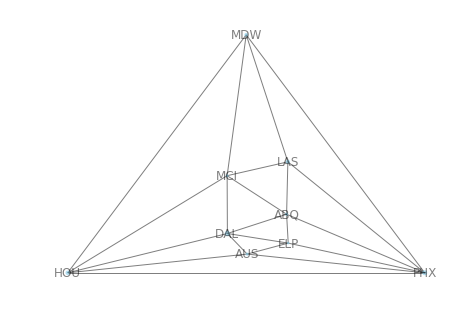

In [792]:
list_of_cities = list(set_of_cities)
list_from = []
list_to = []
for i in range(len(target_matrix.index)):
    for j in range(i + 1, len(target_matrix.index)):
        if (target_matrix.iloc[i, j]):
            list_from.append(target_matrix.index[i])
            list_to.append(target_matrix.index[j])
draw_df = pd.DataFrame({"from":list_from, "to":list_to})
NW = nx.from_pandas_dataframe(draw_df, "from", "to")
dic = {}
for i in target_matrix.index:
    dic[i] = (X[i], Y[i])
nx.draw(NW, pos=dic, with_labels=True, node_size=np.array(graph.incidence_matrix.loc[list(NW.nodes),
                                                                                     list(NW.nodes)].sum()**2 /3000000000),
        node_color="skyblue", node_shape="o", alpha=0.5)


In [793]:
inner_faces

{frozenset({'AUS', 'HOU', 'PHX'}): 1,
 frozenset({'AUS', 'DAL', 'HOU'}): 1,
 frozenset({'AUS', 'ELP', 'PHX'}): 1,
 frozenset({'AUS', 'DAL', 'ELP'}): 1,
 frozenset({'ABQ', 'ELP', 'PHX'}): 1,
 frozenset({'ABQ', 'DAL', 'MCI'}): 1,
 frozenset({'ABQ', 'LAS', 'MCI'}): 1,
 frozenset({'ABQ', 'DAL', 'ELP'}): 1,
 frozenset({'LAS', 'MCI', 'MDW'}): 3,
 frozenset({'ABQ', 'LAS', 'PHX'}): 5,
 frozenset({'DAL', 'HOU', 'MCI'}): 9,
 frozenset({'LAS', 'MDW', 'PHX'}): 27,
 frozenset({'HOU', 'MCI', 'MDW'}): 5}

In [794]:
secondary_cities.reverse()

In [795]:
for el in secondary_cities:
    X[el[0]] = (X[el[1].index] * el[1]).sum() / el[1].sum()
    Y[el[0]] = (Y[el[1].index] * el[1]).sum() / el[1].sum()

In [801]:
def affine_normalize(target_split, X, Y):
    X = X - X[target_split[0][0]]
    Y = Y - Y[target_split[0][0]]
    det = Y[target_split[0][2]] * X[target_split[0][1]] - Y[target_split[0][1]] * X[target_split[0][2]]
    a = (2 * Y[target_split[0][2]] - 4 * Y[target_split[0][1]]) / det
    b = (4 * X[target_split[0][1]] - 2 * X[target_split[0][2]]) / det
    c = 3.5 * Y[target_split[0][2]] / det
    d = -3.5 * X[target_split[0][2]] / det
    X, Y = a * X + b * Y, c * X + d * Y
    return X, Y
X, Y = affine_normalize(target_split, X, Y)

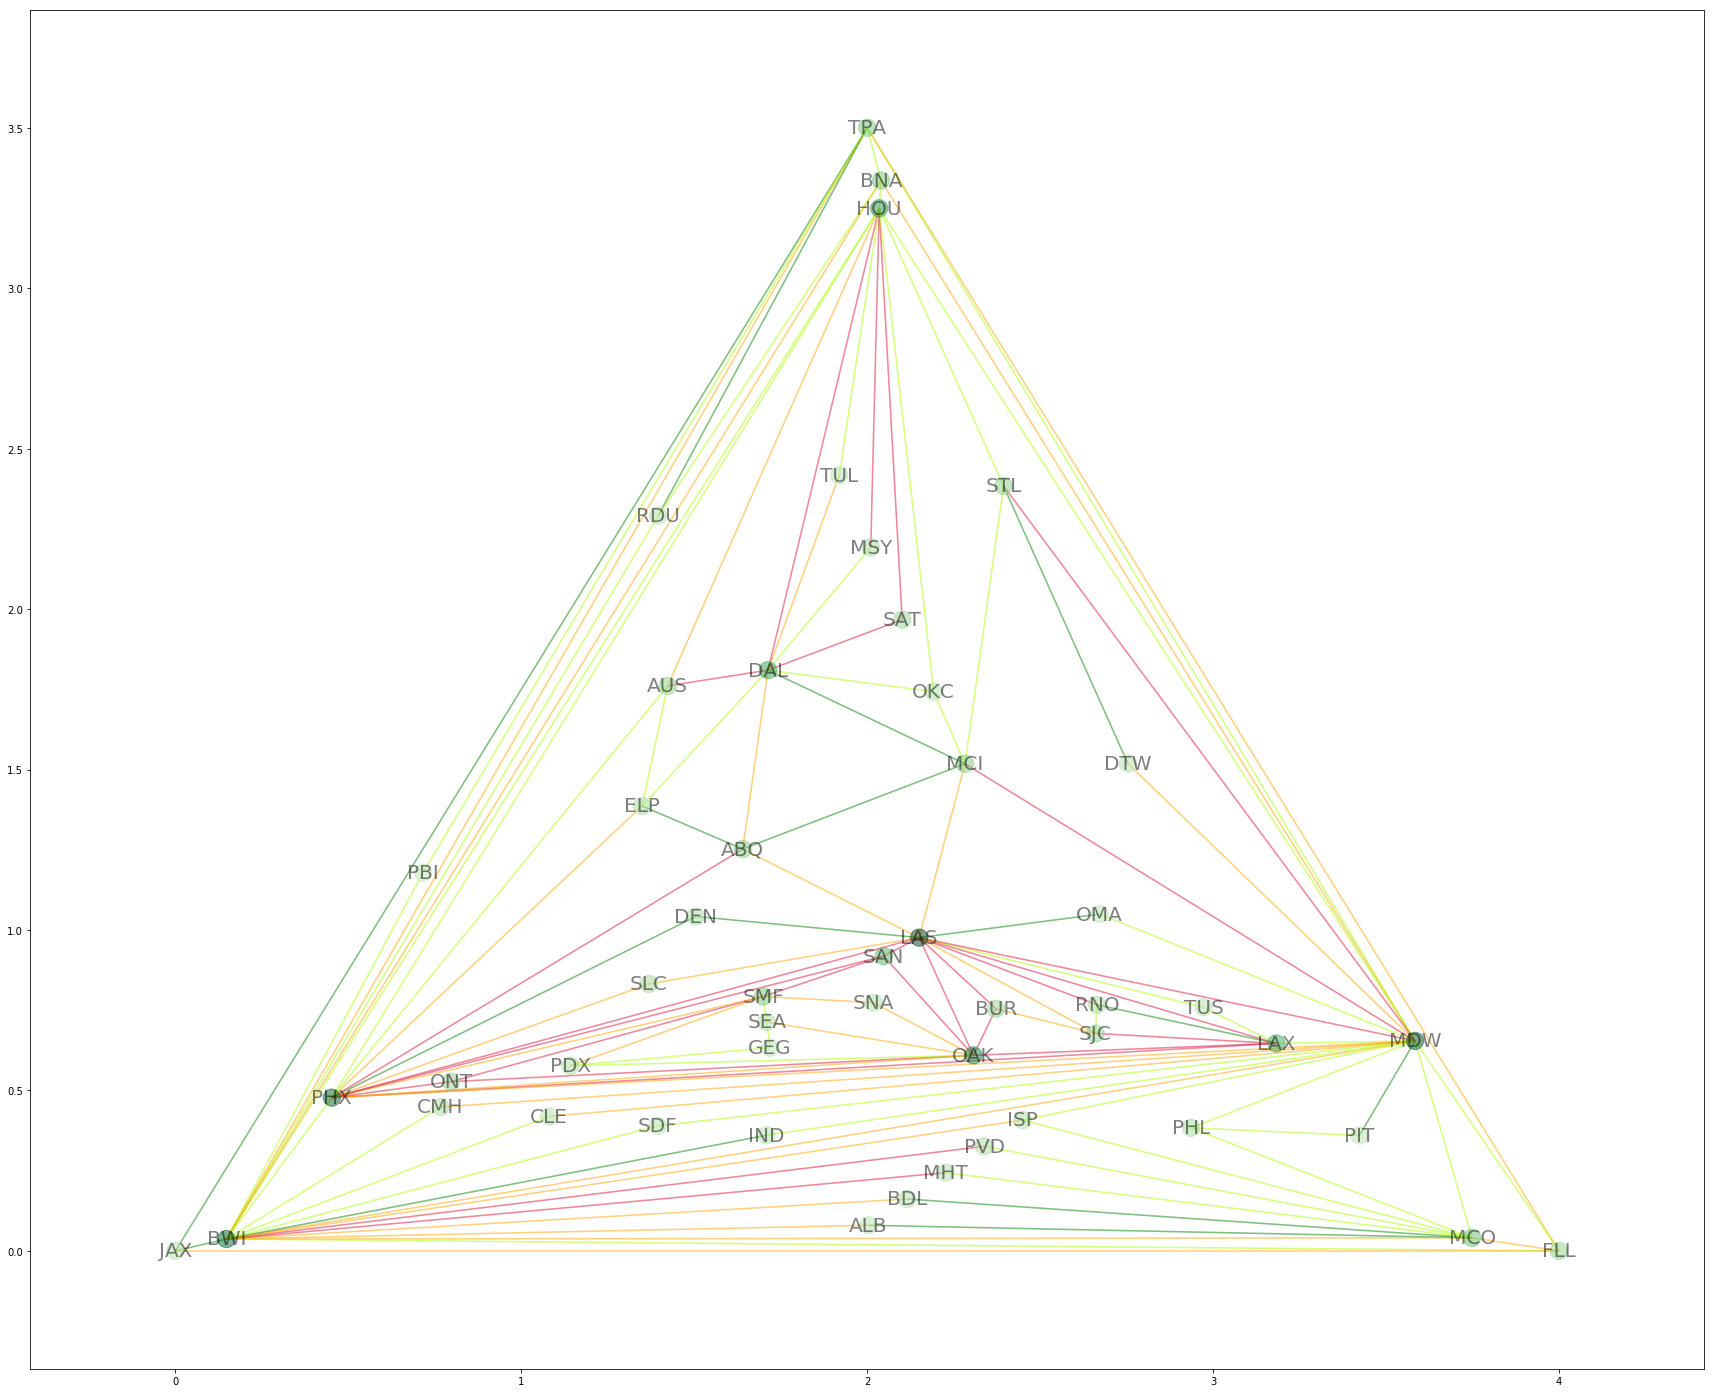

In [803]:
list_of_cities = list(set_of_cities)
list_from = []
list_to = []
list_capacity = []
for i in range(len(set_of_cities)):
    for j in range(i + 1, len(set_of_cities)):
        if (graph.incidence_matrix[list_of_cities[i]][list_of_cities[j]] >= 10000):
            list_from.append(list_of_cities[i])
            list_to.append(list_of_cities[j])
            list_capacity.append(graph.incidence_matrix[list_of_cities[i]][list_of_cities[j]])
draw_df = pd.DataFrame({"from":list_from, "to":list_to, "weight":list_capacity})
fig = plt.figure(figsize=(30,25))
NW = nx.from_pandas_dataframe(draw_df, "from", "to", create_using=nx.Graph())
dic = {}
colors = pd.Series("", index=list(NW.edges()))
for edge in list(NW.edges()):
    if (graph.incidence_matrix[edge[0]][edge[1]] > 25000):
        if (graph.incidence_matrix[edge[0]][edge[1]] > 40000):
            colors[edge] = "crimson"
        else:
            colors[edge] = "orange"
    else:
        if (graph.incidence_matrix[edge[0]][edge[1]] > 15000):
            colors[edge] = "#aaff00"
        else:
            colors[edge] = "green"
for i in set_of_cities:
    dic[i] = (X[i], Y[i])
nx.draw_networkx(NW, pos=dic, with_labels=True, node_size=300,
                 edge_color=colors, node_color=graph.incidence_matrix.loc[list(NW.nodes),
                                                                                     list(NW.nodes)].sum(),
                 cmap=plt.cm.Greens, vmin=-200000, node_shape="o", alpha=0.5, width=1.6,
                 font_size=20)